In [18]:
from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import torch
import time

from skimage.measure import compare_psnr
from utils.demosaicing_utils import *

import colour_demosaicing
imsize = -1
pattern='rggb'
PLOT = True

In [19]:
fname='data/.png' #mcm/8.tif'

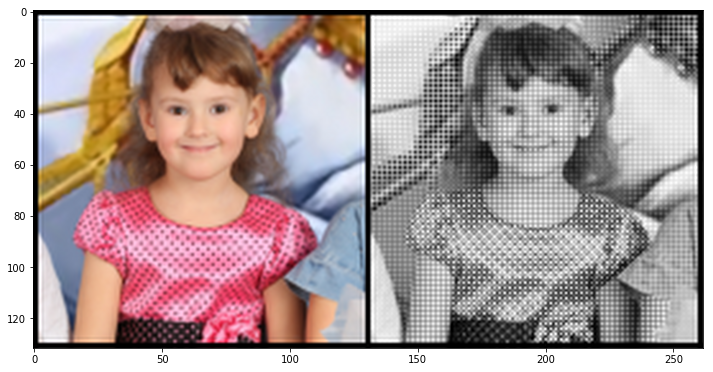

In [20]:
img_pil = Image.open(fname)
RGB = np.array(img_pil)
img_np = RGB.transpose(2,0,1)
CFA = colour_demosaicing.mosaicing_CFA_Bayer(RGB, pattern=u'RGGB')
def bayer(CFA):
    return CFA[None,:]
bayer_np = bayer(CFA)

if PLOT:
    plot_image_grid([img_np, bayer_np], 3,10 )


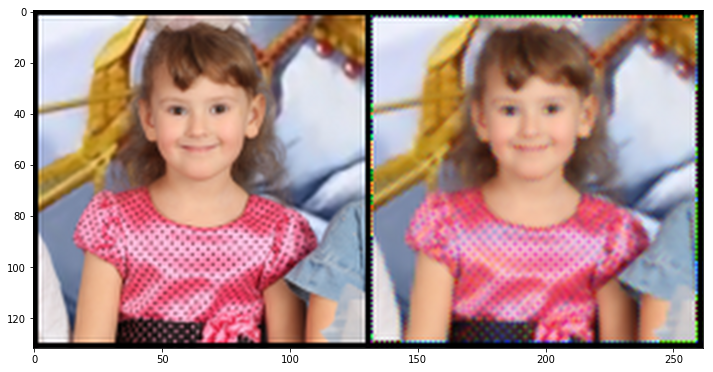

PSNR : 21.6070   
Time for optimization: 0.005073 sec


In [21]:
time_start = time.clock()

Image = colour_demosaicing.demosaicing_CFA_Bayer_bilinear(CFA, pattern=u'RGGB')
time_elapsed = (time.clock() - time_start)
img = Image.transpose(2,0,1)
img_pil =PIL.Image.fromarray(Image)

img_pil.save('bilinear.png')
if PLOT:
    plot_image_grid([img_np,img], 3,10 )
    
print ('PSNR : %.4f   ' %  (compare_psnr(img_np, img)))
print('Time for optimization: %f sec' %(time_elapsed))

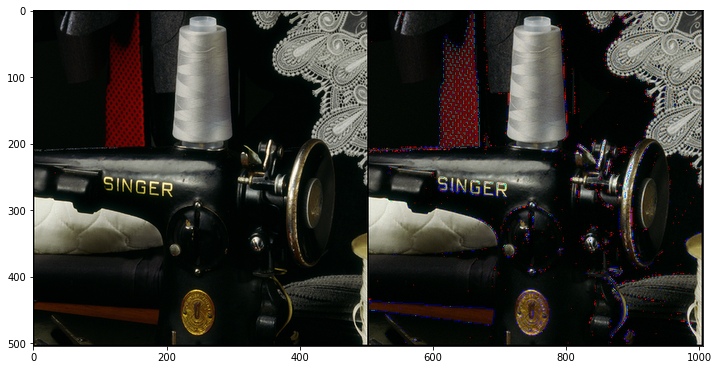

PSNR : 21.7103   


In [7]:
Image1=colour_demosaicing.demosaicing_CFA_Bayer_Malvar2004(CFA, pattern=u'RGGB')
img1 = Image1.transpose(2,0,1)
if PLOT:
    plot_image_grid([img_np,img1], 3,10 )
    
print ('PSNR : %.4f   ' %  (compare_psnr(img_np, img1)))

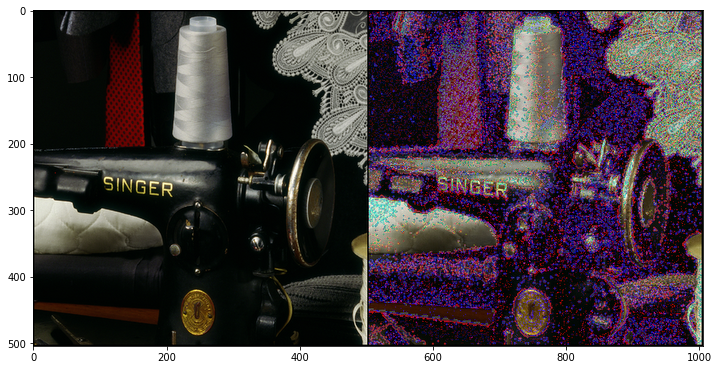

PSNR : 11.5254 


In [8]:
Image2=colour_demosaicing.demosaicing_CFA_Bayer_DDFAPD(CFA, pattern=u'RGGB', refining_step=True)
img2 = Image2.transpose(2,0,1)
if PLOT:
    plot_image_grid([img_np,img2], 3,10 )
    
print ('PSNR : %.4f ' %  (compare_psnr(img_np, img2)))

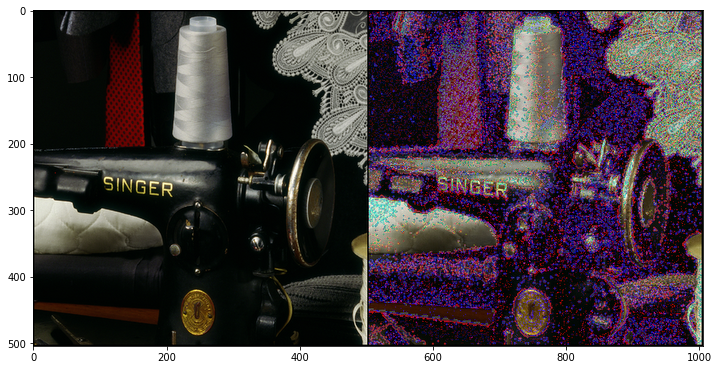

PSNR : 11.5254   


In [9]:
Image3=colour_demosaicing.demosaicing_CFA_Bayer_Menon2007(CFA, pattern=u'RGGB', refining_step=True)
img3 = Image3.transpose(2,0,1)
if PLOT:
    plot_image_grid([img_np,img3], 3,10 )
    
print ('PSNR : %.4f   ' %  (compare_psnr(img_np, img3)))